# Classification Machine Learning Problem

<b>Data Description:</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.<br>

<b>Context:</b>

Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.<br>

<b> Objective: </b>
    
We need to check the overall performence of the Bank Dataset and will use different Machine Learning Algorithms - </b>

Random Forrest <br>
K Nearest Neighbors <br>
SVM <br>
Naive Baise <br>
Decision Tree <br>
Random Forrest <br>
Gradient Boost <br>
XG Boost  <br>

to predict that a client will subscribe (yes/no) a term deposit (variable y) with best Accuracy. <br>

<b>Bank client data</b>

1.	age (numeric)
<br>
2.	job : type of job (categorical: 'admin.','blue- collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technicia n', 'unemployed', 'unknown')
<br>

3.	marital : marital status (categorical:'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
<br>
4.	education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
<br>
5.	default: has credit in default? (categorical: 'no','yes','unknown')
<br>
6.	balance: average yearly balance, in euros (numeric)
<br>
7.	housing: has housing loan? (categorical: 'no','yes','unknown')
<br>
8.	loan: has personal loan? (categorical: 'no','yes','unknown')
<br>
9.	contact: contact communication type (categorical: 'cellular','telephone')
<br>
10.	day: last contact day of the month (numeric 1 -31)
<br>
11.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
12.	duration: last contact duration, in seconds (numeric)
<br>
13.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
14.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
15.	15.previous: number of contacts performed before this campaign and for this client (numeric)
<br>
16.	poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
17.	17.target: has the client subscribed a term deposit? (binary: "yes","no")
<br>

<b>Importing Nescessary Data Analysis Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<b>Reading the Dataset

In [2]:
bank = pd.read_csv('G:/TCS Study/TCS Git Hub Projects/Classification Project/bank-full.csv', sep = ',')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<b>Exploratory Data Analysis</b>

Take a look at the type, number of columns, entries, null values etc.<br>

In [3]:
bank.info()
bank.isnull().any() # To search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

<b>As per observation there is no missing value in the data.

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

<b>As per the nature of data, entire data set can be classified as follows</b>

<b>Bank client data:</b>
<br>
Age <br>
Job <br>
Marital <br>
Education <br>
Default <br>
Balance <br>
Housing <br>
Loan <br>

<b>Related with the last contact of the current campaign:</b>
<br>
Contact <br>
Month <br>
Day <br>
Duration <br>

<b>Other attributes:</b>
<br>
Campaign <br>
Pdays<br>
Previous <br> 
Poutcome <br>

<b>Traget Variable:</b>
<br>
Target<br>

<b>Bank client data Analysis and Categorical Treatment</b>

Work with the atributes related to bank clients <br>
To make things more clear, we'll going to creat a new datasets that contains just this part of data <br>

In [5]:
bank_client = bank.iloc[: , 0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


 <b>Knowing the Categorical Variables

In [6]:
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


<b>Trying to find some insights crossing those Continuous Variables: Age, Balance

<b>Age</b><br>
Trying to find null values<br>

In [7]:
print('Min age: ', bank_client['age'].min())
print('Max age: ', bank_client['age'].max())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  18
Max age:  95
Null Values:  False


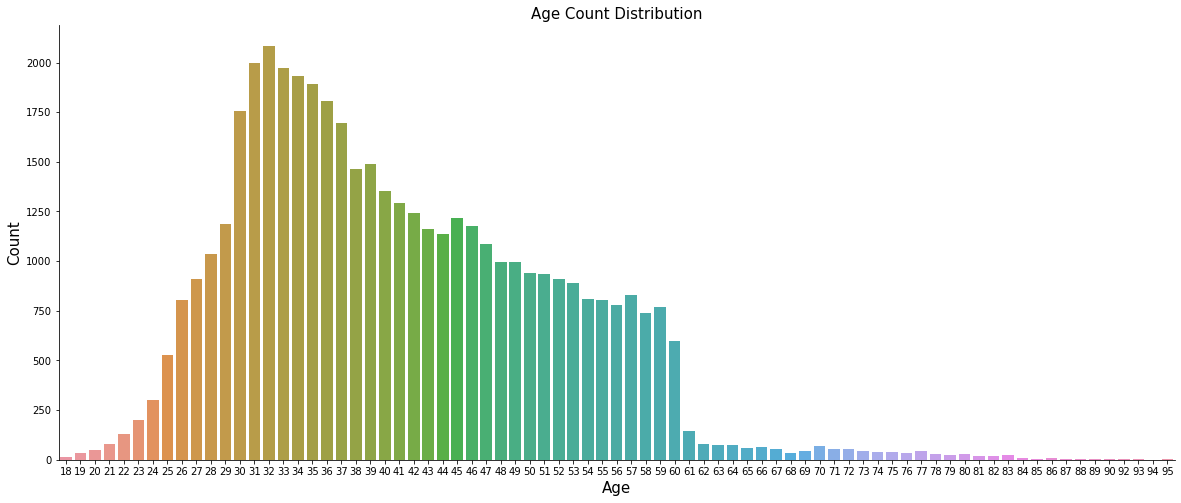

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

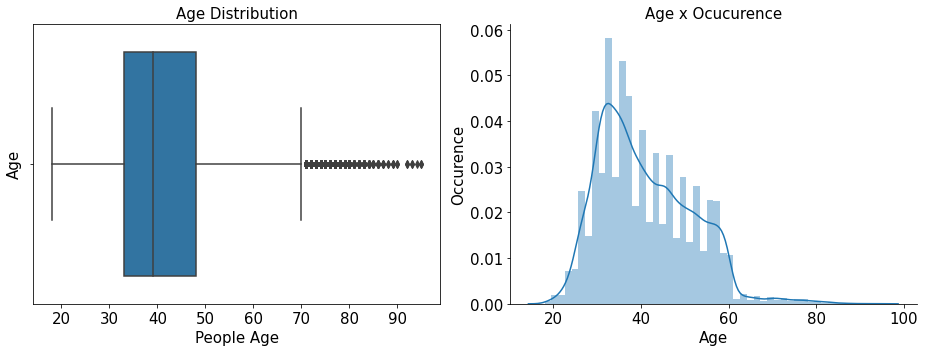

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [10]:
# Quartiles:
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
# Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [11]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
# Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  554
Number of clients:  45211
Outliers are: 1.23 %


In [12]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
# cv < 15%, low dispersion
# cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.9
STD : 10.6
CV  : 25.9 , High middle dispersion


Conclusion: About AGE - Due to almost high dispersion and just looking at this graph we cannot conclude if age 
have a high effect to our variable Target, need to keep searching for some pattern.<br>
High middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, the model can be fitted with and without AGE.

In [13]:
# Balance
# Trying to find null values
print('Min balance: ', bank_client['balance'].min())
print('Max balance: ', bank_client['balance'].max())
print('Null Values: ', bank_client['balance'].isnull().any())

Min balance:  -8019
Max balance:  102127
Null Values:  False


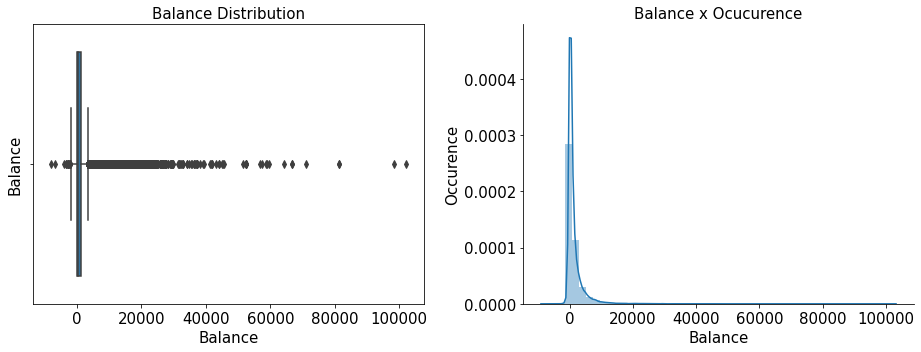

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'balance', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [15]:
# Quartiles:
print('1º Quartile: ', bank_client['balance'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['balance'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['balance'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['balance'].quantile(q = 1.00))
# Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Balance above: ', bank_client['balance'].quantile(q = 0.75) + 
                      1.5*(bank_client['balance'].quantile(q = 0.75) - bank_client['balance'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  72.0
2º Quartile:  448.0
3º Quartile:  1428.0
4º Quartile:  102127.0
Balance above:  3462.0 are outliers


In [16]:
print('Numerber of outliers: ', bank_client[bank_client['balance'] > 69.6]['balance'].count())
print('Number of clients: ', len(bank_client))
# Outliers in %
print('Outliers are:', round(bank_client[bank_client['balance'] > 69.6]['balance'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  34018
Number of clients:  45211
Outliers are: 75.24 %


Conclusion: About Balance- As the number of Outlier is very high in dataset, so we'll exclude Balance variable from model building.

<b>Relation of the Categorical Variables with Age in bank_client Data

JOBS

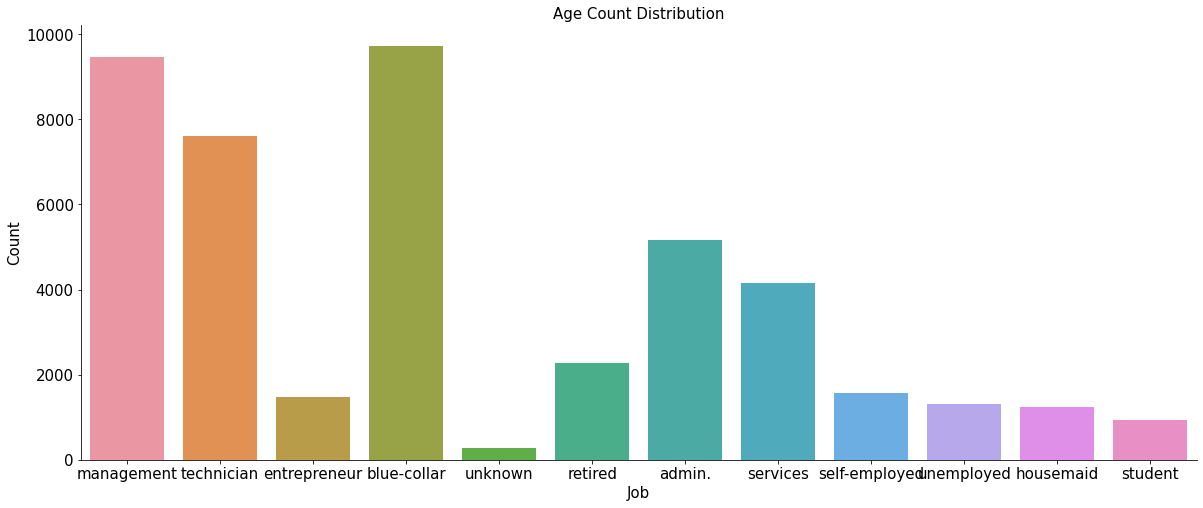

In [17]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

MARITAL

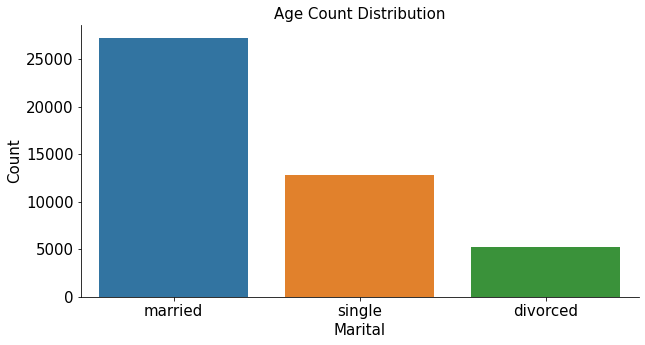

In [18]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

EDUCATION

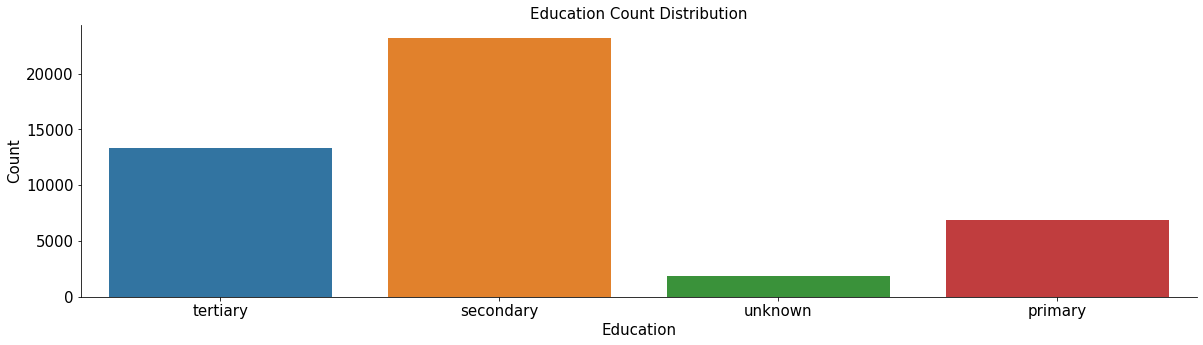

In [19]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

DEFAULT, HOUSING, LOAN

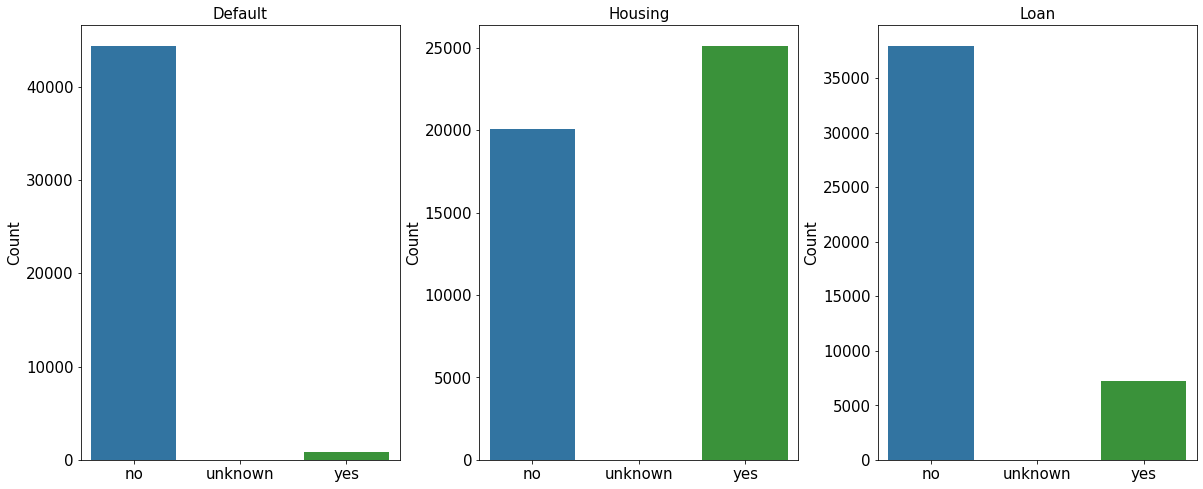

In [20]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [21]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 44396 
 Unknown credit in default: 0 
 Yes to credit in default: 815


In [22]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 20081 
 Unknown housing in loan: 0 
 Yes to housing in loan: 25130


In [23]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 37967 
 Unknown to personal loan: 0 
 Yes to personal loan: 7244


BANK CLIENTS CONCLUSION:<br>

The AGEs don't mean to much, has a medium dispersion.<br>

Jobs, Marital and Education will be the best analysis, that are just the count of each variables, if we relate with the other ones. It will be not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.<br>

As the number of Outlier is very high in dataset, so we'll exclude Balance variable from model building.<br>

Default, loan and housing, its just to see the distribution of people.<br>

<b>Bank Client Categorical Treatment</b><br>
Jobs, Marital, Education, Default, Housing, Loan.<br>
Converting to continuous due the feature scaling with Label Encoder.

In [24]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])

<b>Segregation the AGE to different groups to make it as a Categorical Variable 

In [25]:
# function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [26]:
bank_client = bank_client.drop(['balance'], axis=1) # Removing Balance due to high percentage of Outliers
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,4,1,2,0,1,0
1,2,9,2,1,0,1,0
2,2,2,1,1,0,1,1
3,2,1,1,3,0,1,0
4,2,11,2,3,0,0,0


<b>Related with the last contact of the current campaign</b><br>
Treat Categorical, see those values <br>
Group Continuous Variables if necessary <br>

In [27]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [28]:
bank_related.isnull().any()

contact     False
day         False
month       False
duration    False
dtype: bool

In [29]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day'].unique())

Kind of Contact: 
 ['unknown' 'cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


Duration

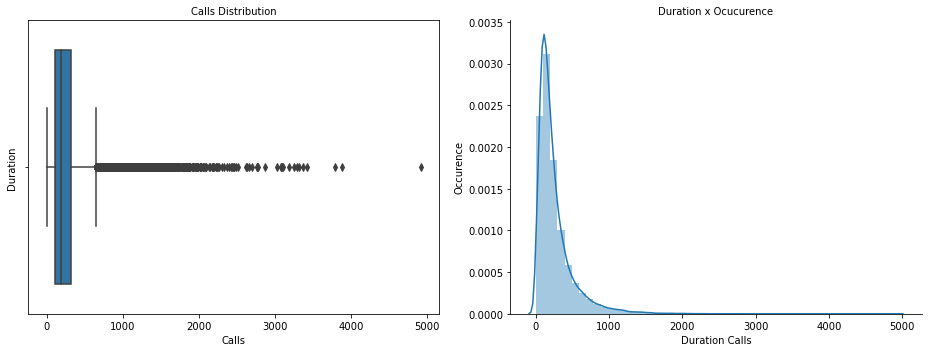

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [31]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [32]:
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [33]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  3222
Number of clients:  45211
Outliers are: 7.13 %


In [34]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE EXCLUDED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


<b>Contact, Month, Day of Week

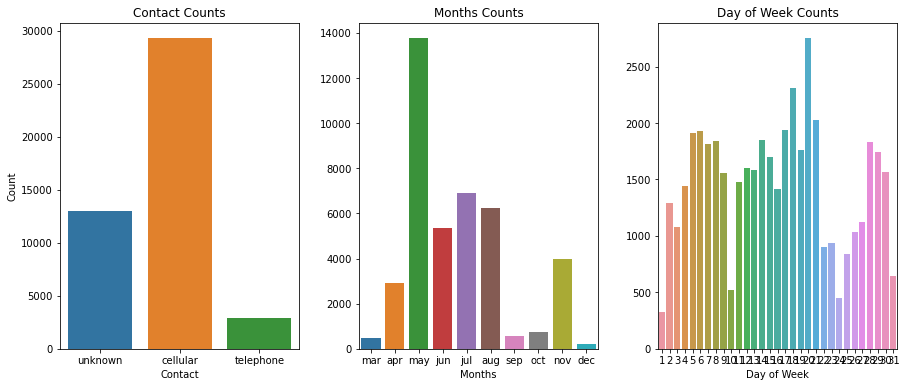

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [36]:
print('Duration above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [37]:
bank_related[bank_related['duration'] > 640].count()

contact     3272
day         3272
month       3272
duration    3272
dtype: int64

<b>Contact, Month, Day of Week treatment

In [38]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day'] = labelencoder_X.fit_transform(bank_related['day'])

In [39]:
bank_related.head()

,contact,day,month,duration
0,2,4,8,261
1,2,4,8,151
2,2,4,8,76
3,2,4,8,92
4,2,4,8,198


In [40]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);
# Excluded the lines where call duration is zero

In [41]:
bank_related.head()

,contact,day,month,duration
0,2,4,8,3
1,2,4,8,2
2,2,4,8,1
3,2,4,8,1
4,2,4,8,3


<b>Other attributes

In [42]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [43]:
bank_o['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [44]:
bank_o['poutcome'].replace(['unknown','other', 'failure', 'success'], [0,1,2,3], inplace  = True)

In [45]:
bank_final= pd.concat([bank_client, bank_related, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(45211, 15)

<b>4. Model Building

In [46]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
y = pd.get_dummies(bank['Target'], columns = ['Target'], prefix = ['Target'], drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [47]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3734,1,1,2,0,0,1,0,2,15,8,1,1,-1,0,0
28119,2,4,1,2,0,0,0,0,27,4,2,1,-1,0,0
36942,2,9,1,1,0,1,0,0,11,8,5,3,172,4,2
4710,1,1,1,0,0,1,0,2,19,8,4,2,-1,0,0
26402,2,2,1,2,0,0,0,0,19,9,3,1,-1,0,0


In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<b>5. Standard Classification Algorithms

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

k=1 86.86 (+/- 0.71)
k=2 88.66 (+/- 0.55)
k=3 88.63 (+/- 0.52)
k=4 88.93 (+/- 0.55)
k=5 88.97 (+/- 0.51)
k=6 89.09 (+/- 0.59)
k=7 89.19 (+/- 0.52)
k=8 89.10 (+/- 0.59)
k=9 89.16 (+/- 0.66)
k=10 89.08 (+/- 0.55)
k=11 89.13 (+/- 0.56)
k=12 89.11 (+/- 0.54)
k=13 89.14 (+/- 0.54)
k=14 89.01 (+/- 0.52)
k=15 89.06 (+/- 0.52)
k=16 89.03 (+/- 0.56)
k=17 89.05 (+/- 0.45)
k=18 89.01 (+/- 0.52)
k=19 89.10 (+/- 0.51)
k=20 89.00 (+/- 0.51)
k=21 89.02 (+/- 0.49)
k=22 89.01 (+/- 0.51)
k=23 89.08 (+/- 0.46)
k=24 89.08 (+/- 0.47)
k=25 89.08 (+/- 0.46)
The optimal number of neighbors is 6 with 89.2%


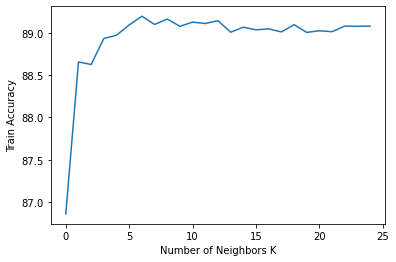

In [50]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [52]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [55]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[08:07:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:08:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:08:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [60]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting', 'XG Boost'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV, XGB]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,XG Boost,0.906713
6,Gradient Boosting,0.903423
0,Random Forest Classifier,0.899276
4,Logistic Model,0.894409
3,K-Near Neighbors,0.894161
1,Decision Tree Classifier,0.875056
2,Support Vector Machine,0.839223
5,Gausian NB,0.825205


As per the K-Fold Cross Validation, Ensemble Learnings are providing best results for the accuracy score.<br>

Accuracy is also measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

As per the test result, Ensemble Learnings are providing exellent (A) results whereas remaining other classifications are providing good (B) result.

<b>7. Comparing the perfromances for all Models

<b>ROC/ AUC , BEST MODEL

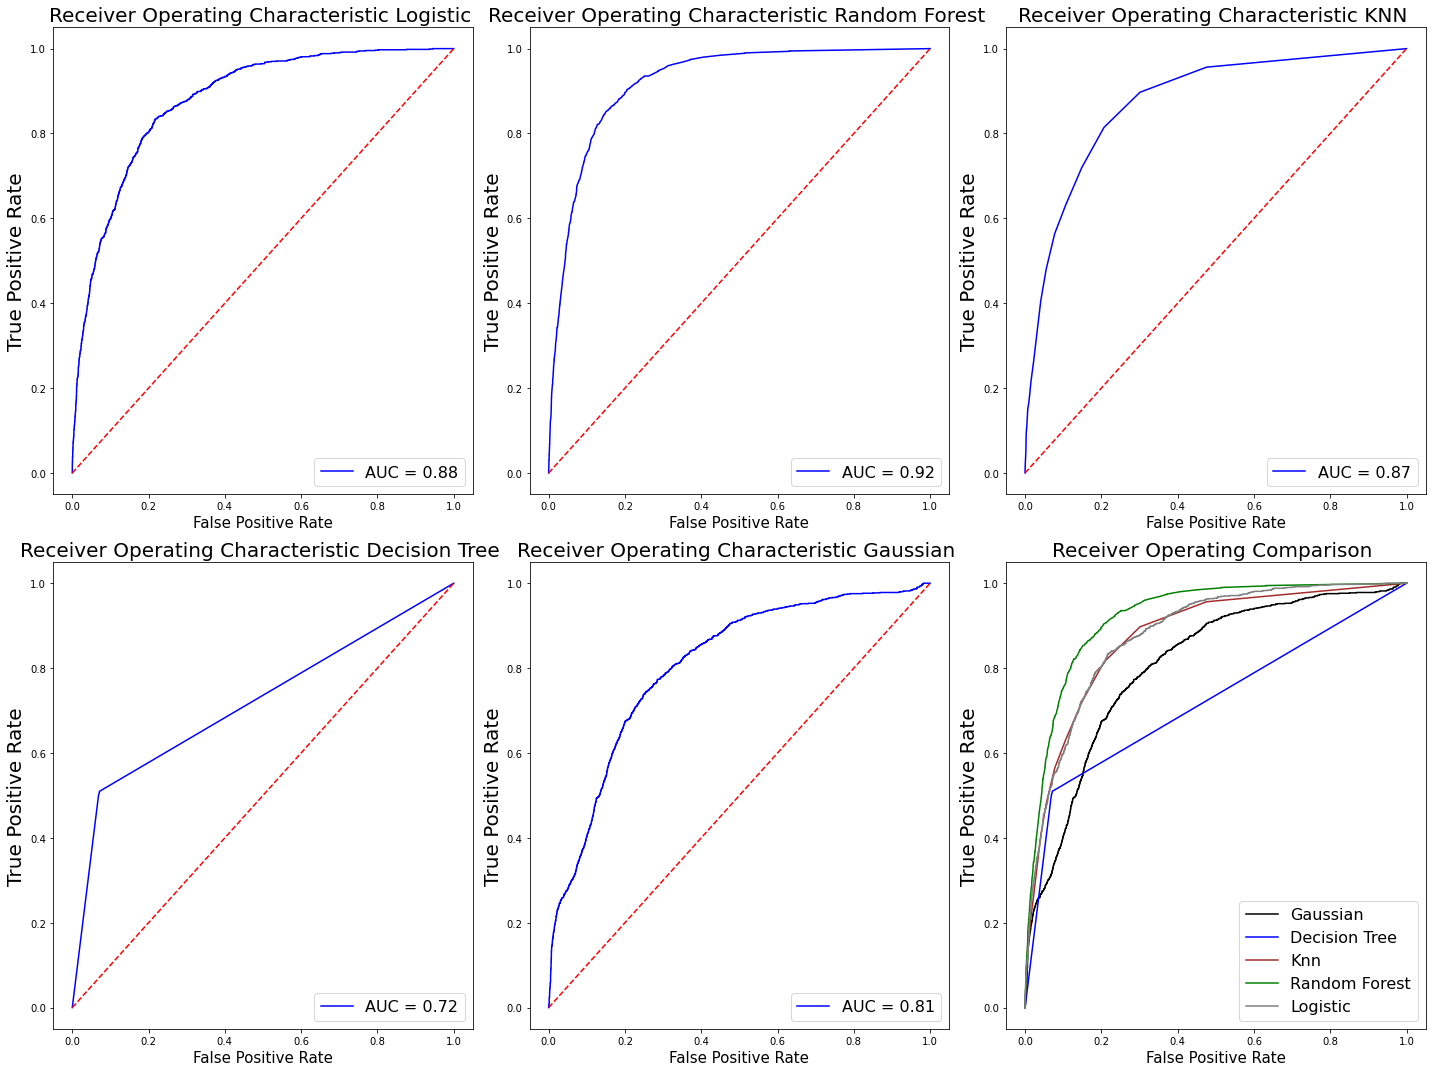

In [61]:
from sklearn import metrics
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

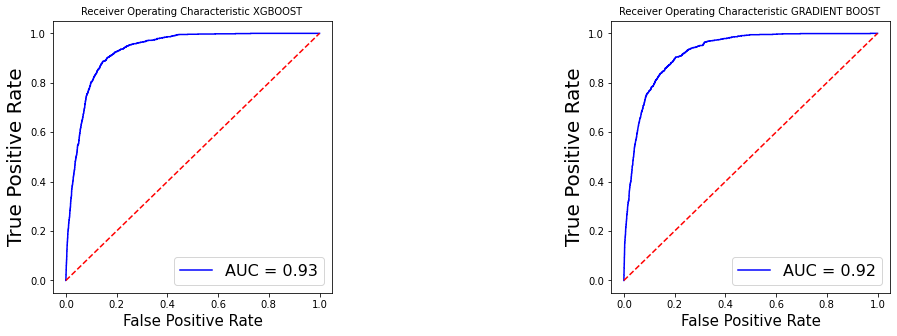

In [62]:
# XGBOOST ROC/ AUC , BEST MODEL

fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

ANALYZING THE RESULTS:
</br>

So now we have to decide which one is the best model, and we have two types of wrong values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.

False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont. <br>

Considering the Objective, "The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)." <br>

<b>As we know:</b>

From K-Fold Cross Validation Accurcy Score and ROC Curve, Ensemble Learnings (Random Forrest, Geadient Boostand XG Boost) are giving best results.<br>

We are extending the process with Confusion Matrix and Classification Reports for Different Models.

<b>Conusion Matrix

In [63]:
from sklearn.metrics import classification_report

In [64]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Confusion Matrix
 [[7861   83]
 [ 912  187]]
KNN Reports
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7944
           1       0.69      0.17      0.27      1099

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [65]:
print('LOGR Confusion Matrix\n', confusion_matrix(y_test, logpred))
print('LOGR Reports\n',classification_report(y_test, logpred))

LOGR Confusion Matrix
 [[7794  150]
 [ 800  299]]
LOGR Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7944
           1       0.67      0.27      0.39      1099

    accuracy                           0.89      9043
   macro avg       0.79      0.63      0.66      9043
weighted avg       0.88      0.89      0.87      9043



In [66]:
print('SVC Confusion Matrix\n', confusion_matrix(y_test, svcpred))
print('SVC Reports\n',classification_report(y_test, svcpred))

SVC Confusion Matrix
 [[7227  717]
 [ 801  298]]
SVC Reports
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      7944
           1       0.29      0.27      0.28      1099

    accuracy                           0.83      9043
   macro avg       0.60      0.59      0.59      9043
weighted avg       0.83      0.83      0.83      9043



In [67]:
print('DTREE Confusion Matrix\n', confusion_matrix(y_test, dtreepred))
print('DTREE Reports\n',classification_report(y_test, dtreepred))

DTREE Confusion Matrix
 [[7398  546]
 [ 550  549]]
DTREE Reports
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7944
           1       0.50      0.50      0.50      1099

    accuracy                           0.88      9043
   macro avg       0.72      0.72      0.72      9043
weighted avg       0.88      0.88      0.88      9043



In [68]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Confusion Matrix
 [[7701  243]
 [ 650  449]]
RFC Reports
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7944
           1       0.65      0.41      0.50      1099

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [69]:
print('GAUSSIAN Confusion Matrix\n', confusion_matrix(y_test, gaussiannbpred))
print('GAUSSIAN Reports\n',classification_report(y_test, gaussiannbpred))

GAUSSIAN Confusion Matrix
 [[6914 1030]
 [ 554  545]]
GAUSSIAN Reports
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7944
           1       0.35      0.50      0.41      1099

    accuracy                           0.82      9043
   macro avg       0.64      0.68      0.65      9043
weighted avg       0.86      0.82      0.84      9043



In [70]:
print('GRADIENT BOOST Confusion Matrix\n', confusion_matrix(y_test, gbkpred))
print('GRADIENT BOOST Reports\n',classification_report(y_test, gbkpred))

GRADIENT BOOST Confusion Matrix
 [[7754  190]
 [ 681  418]]
GRADIENT BOOST Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7944
           1       0.69      0.38      0.49      1099

    accuracy                           0.90      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [71]:
print('XG BOOST Confusion Matrix\n', confusion_matrix(y_test, xgbprd))
print('XG BOOST Reports\n',classification_report(y_test, xgbprd))

XG BOOST Confusion Matrix
 [[7667  277]
 [ 599  500]]
XG BOOST Reports
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7944
           1       0.64      0.45      0.53      1099

    accuracy                           0.90      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.89      0.90      0.90      9043



# Conclusion: 
<b> From the above Performance Comparison for different Models we found out that Ensemble Learnings (Random Forrest, Geadient Boostand XG Boost) are giving the best results<b>